# **Data Mining Project**
รหัสวิชา 05406102

ชื่อวิชา Data Mining and Its Applications

ภาคการศึกษาต้น ปีการศึกษา 2567

# หัวข้อ: **การทำนายราคาบ้านอสังหาริมทรัพย์ จากผลข้อมูลที่ประกอบไปด้วยลักษณะต่างๆ ของบ้านแต่ละหลัง ในรัฐแห่งหนึ่งที่สหรัฐอเมริกา**

**สมาชิก**
1. ซอฟวาน วาแม็ง 65050221
2. ณภัษ อ่วมศิริ 65050243
3. ณัฐนันท์ จิระสมประเสริฐ 65050256
4. ณัฎยา แยะคำ 65050259
5. ณัฏฐณิชา ธาราเพ็ชรัตน์ 65050291
6. พัชรวิญ จันมูล 65050612
7. ภาณุภณ สิริวรพาส 65050689   
8. นนทพรรณ ทองขวัญ 65050432
9. อารียา สมมี 65051023

# **Import**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Read CSV File**

In [ ]:
data = pd.read_csv('dataset.csv')

# **Exploratory Data Analysis**

In [ ]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,12,2008,WD,Normal,250000


In [ ]:
data.shape

(1460, 81)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# House Price **Distribution**

<ipython-input-6-b2c815fc9d82>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data['SalePrice'], palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


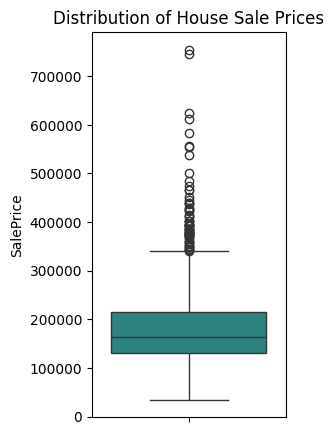

In [ ]:
plt.figure(figsize=(2.5,5))

sns.boxplot(data=data['SalePrice'], palette='viridis')

plt.title('Distribution of House Sale Prices')
plt.ylabel('SalePrice')

plt.show()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-7-109da8e639a9>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

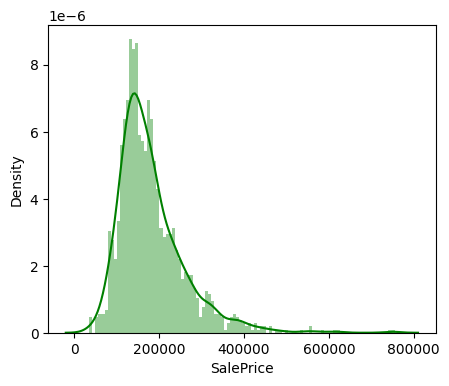

In [ ]:
# describe basic stat
# ดูคร่าวๆ ว่าราคาบ้านเฉลี่ย, ต่ำสุด, สูงสุด เป็นยังไง

print(data['SalePrice'].describe())

# แสดงกราฟ Histogram, กำหนด Size ของรูปภาพ
# alpha ใช้กำหนดค่าโปร่งใส โดย 0 คือโปร่งใสสุด และ 1 คือทึบสุด
plt.figure(figsize=(5, 4))
sns.distplot(data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})

In [ ]:
print(data['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


# Numerical data **distribution**

In [ ]:
#Check Data Type
list(set(data.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [ ]:
#ดึงมาแค่ float, int เพื่อที่จะนำมาคำนวณ "Correlation"
df_num = data.select_dtypes(include = ['float', 'int'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
#Drop Column 'Id' เพราะไม่ได้จะนำไปคำนวณ "Correlation"
df_num = df_num.drop('Id', axis=1)

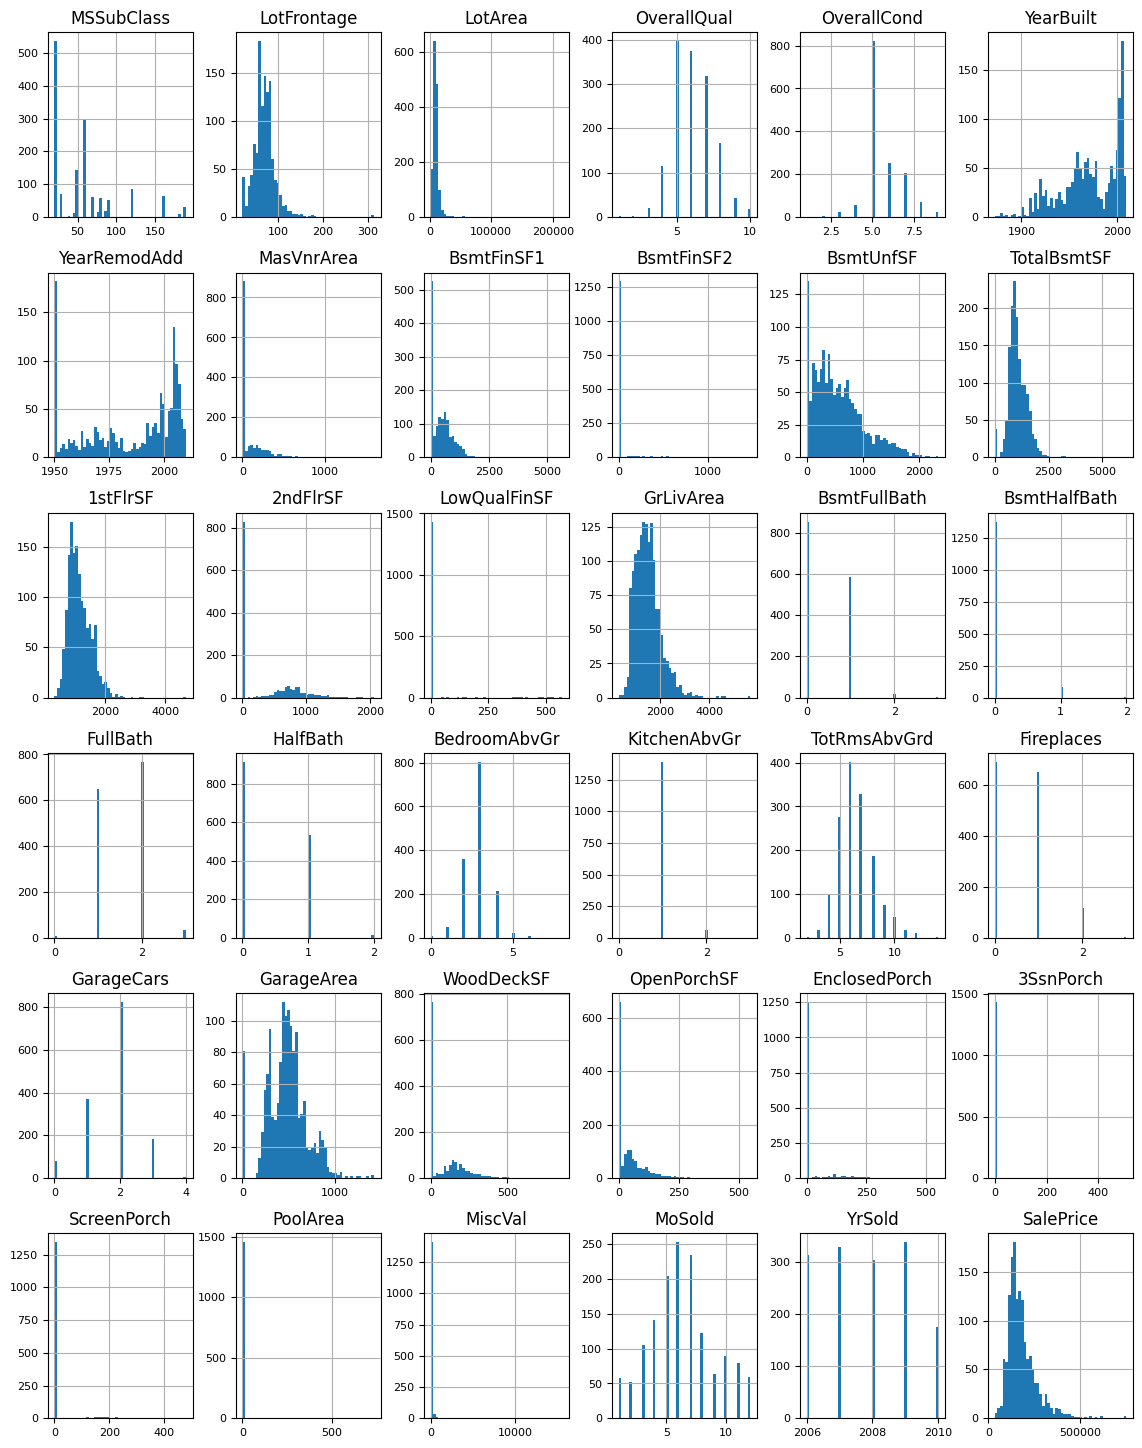

In [ ]:
#Plot Histogram
#
# ดูอีกทีว่าจะใช้ป่าว
#
df_num.hist(figsize=(14, 18), bins=50, xlabelsize=8, ylabelsize=8);

# **Missing Values**

In [ ]:
len(data.columns)

81

In [ ]:
# Making a list of columns with missing values
missing_values = [col for col in data.columns if data[col].isnull().any()]

# Printing the number of missing values and percentage of missing values in each column
for col in missing_values:
    print(col, round(data[col].isnull().mean(), 3), "% missing values")

LotFrontage 0.177 % missing values
MasVnrType 0.005 % missing values
MasVnrArea 0.005 % missing values
Electrical 0.001 % missing values


# **Handling the Missing Values**

In [ ]:
# Before Dropping Missing Values
print("ก่อนทำการ Dropping Missing Values จะมี Feature ทั้งหมด =",len(data.columns))

ก่อนทำการ Dropping Missing Values จะมี Feature ทั้งหมด = 81


In [ ]:
# Dropping the columns with more than 15% missing values
data.drop(['LotFrontage'], axis=1, inplace=True)

In [ ]:
# After Dropping Missing Values
print("หลังทำการ Dropping Missing Values จะมี Feature ทั้งหมด =",len(data.columns))

หลังทำการ Dropping Missing Values จะมี Feature ทั้งหมด = 80


# **Filling the Missing Values**

In [ ]:
# Check Data Types
data.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotArea,int64
Street,object
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [ ]:
data.iloc[234, 24]

nan

In [ ]:
# Filling the missing values in the remaining columns with the most frequent value
# ถ้า Feature ไหนเป็น Object ให้เติมค่าว่างด้วย ฐานนิยม(Mode)
# ถ้าไม่ใช่ ให้แทนค่าว่างด้วย ค่ามัธยฐาน(Median)

new_missing_values = [col for col in data.columns if data[col].isnull().any()]
for col in new_missing_values:
    if data[col].dtype == 'O':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

<ipython-input-20-0edcbd5c8e24>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
<ipython-input-20-0edcbd5c8e24>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
data.iloc[234, 24]

'No'

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,No,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,No,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,No,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,No,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,12,2008,WD,Normal,250000


# **Prepare the dataset**

In [ ]:
# จะเห็นได้ว่ามีแต่ Field ที่เกี่ยวกับตัวเลข only เพราะเราจะนำไปทำ "Correlation"
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

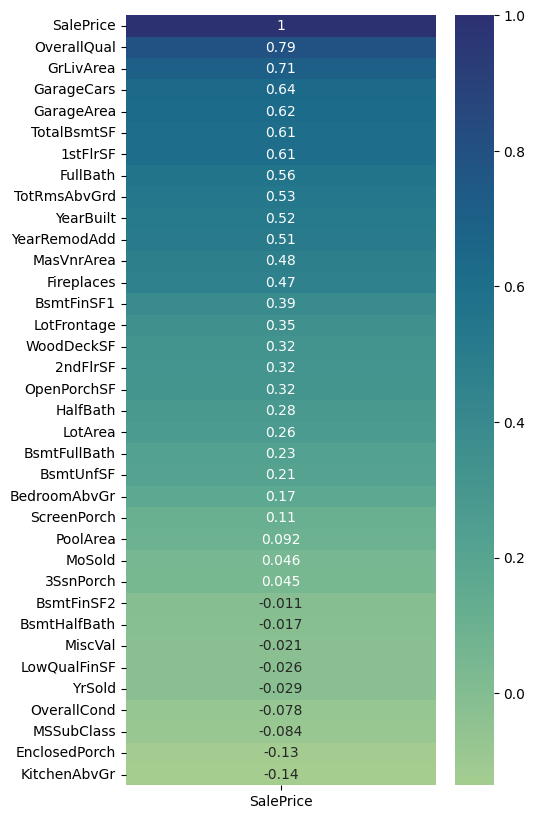

In [ ]:
# ดูความสัมพันธ์ว่าอันไหนสัมพันธ์กันมาก,น้อย ทิศทาง + หรือ - เพื่อใช้เลือก Feature ที่จะมาทำ Model

plt.figure(figsize=(5, 10))
corr_matrix = df_num.corr()[['SalePrice']].sort_values('SalePrice', ascending=False)

sns.heatmap(corr_matrix, annot=True, cmap="crest")
plt.show()

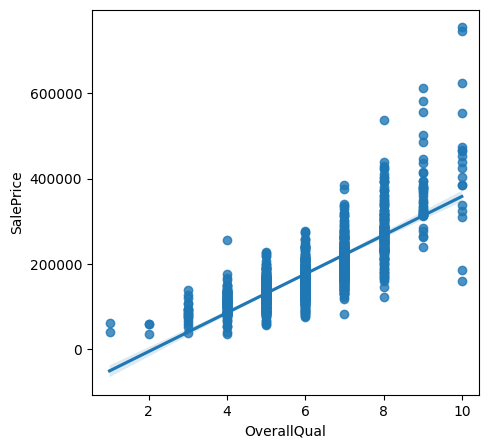

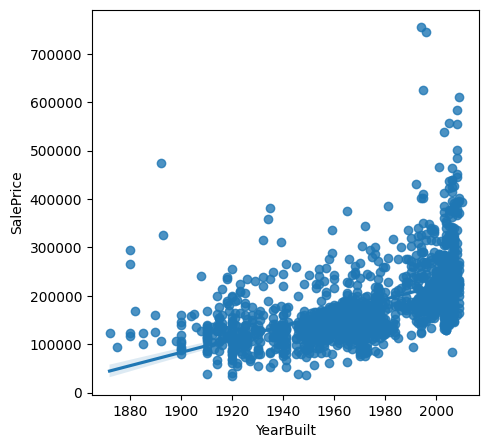

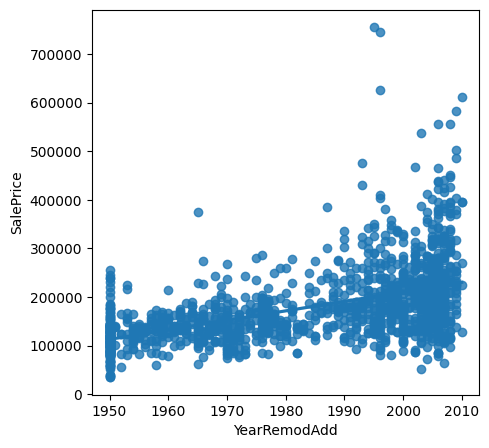

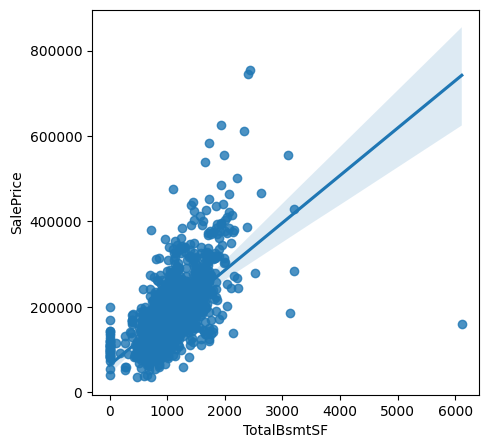

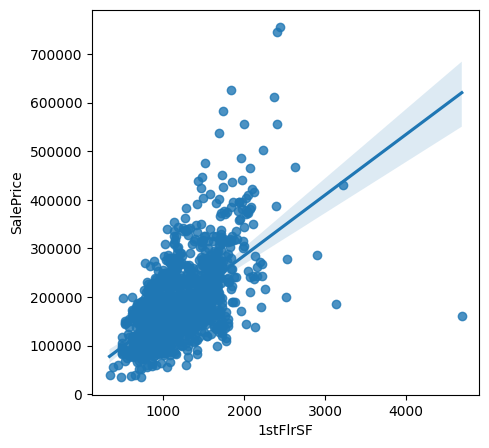

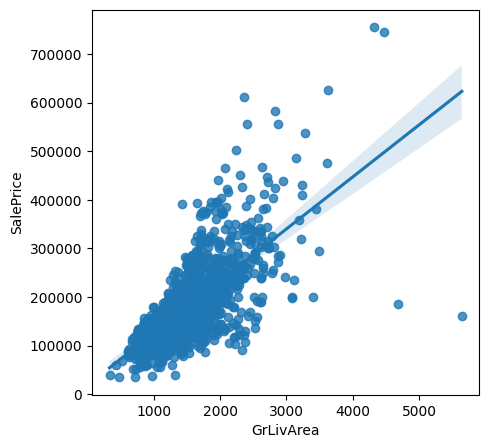

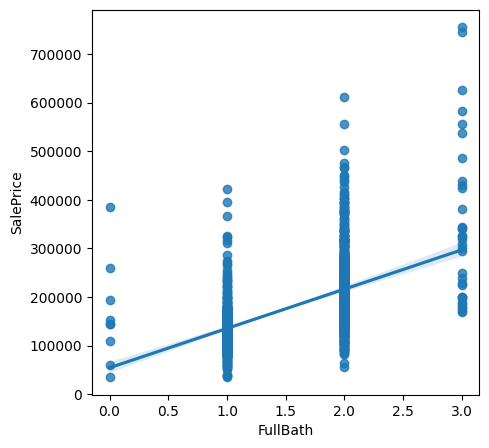

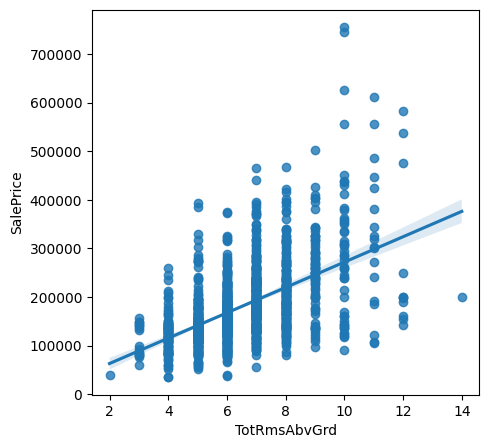

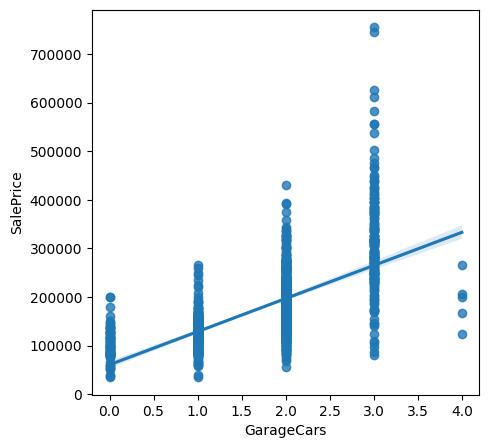

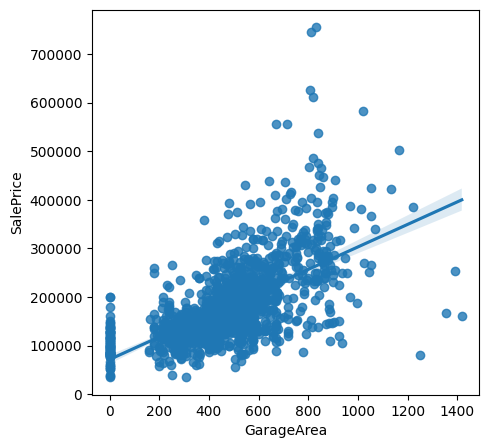

In [ ]:
#สร้าง Scatter Plot ที่มีค่าสหสัมพันธ์มากกว่า 0.5
#ถ้า feature เป็น 'SalePrice' ไม่ต้องสร้างกราฟนั้น

for col in df_num.corr()[df_num.corr()['SalePrice'] > 0.5].index:
    if col == 'SalePrice':
        pass
    else:
        plt.figure(figsize=(5,5))
        sns.regplot(x=df_num[col], y=df_num['SalePrice'])
        plt.show()

# **Modeling**

## Linear Regression

In [ ]:
# ML Workflow
## 4 steps: split > train > score > evaluate

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
X = df_num[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]
y = df_num['SalePrice']

## 1. Split data
# แบ่งข้อมูล [80, 20] และ set seed ไว้ที่ 41
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=41
)

## 2. Train model
# ใช้ Model Regression
model_lm = LinearRegression()
model_lm.fit(X_train, y_train)

## 3. Predict
y_pred = model_lm.predict(X_test)

## 4. Evaluate

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # ใส่ Square root
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error: {:.4f}".format(mae))
print("Mean Squared Error: {:.4f}".format(mse))
print("Root Mean Squared Error: {:.4f}".format(rmse))
print("R-squared: {:.4f}".format(r2))

Mean Absolute Error: 22030.0933
Mean Squared Error: 884673636.1384
Root Mean Squared Error: 29743.4638
R-squared: 0.8341


In [ ]:
model_lm.fit(X_train, y_train)

LinearRegression()

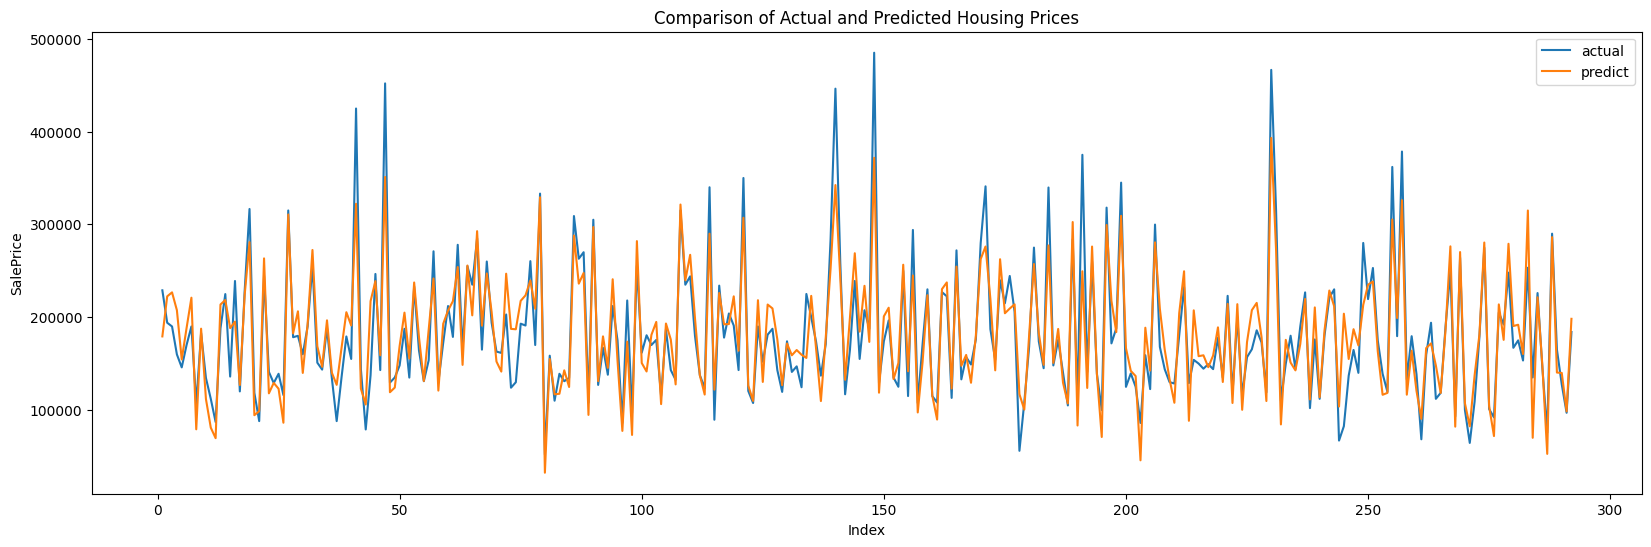

In [ ]:
# ids แทนตัวแปร x ก็คือ มีข้อมูลทั้งหมด 293 record ที่นำมา predict
ids = np.arange(1, 293)

# ปรับขนาดกราฟ
plt.figure(figsize=(20, 6))

# Plot SalePrice ของ y_test และ y_pred
plt.plot(ids, y_test, label='actual')
plt.plot(ids, y_pred, label='predict')

# รายละเอียด
plt.title('Comparison of Actual and Predicted Housing Prices')
plt.xlabel('Index')
plt.ylabel('SalePrice')
plt.legend()

# แสดงกราฟ
plt.show()

- กราฟเส้นสีส้ม แทนค่าที่ทำนายออกมา
- กราฟเส้นสีน้ำเงิน แทนราคาเดิมของบ้านนั้นๆ
> ค่า R-squared 83.41% ถือว่าเป็นค่าที่ค่อนข้างดี และบ่งบอกว่าโมเดลของเราสามารถอธิบายความแปรปรวนของข้อมูลจริงได้ถึง 83.41% นั่นหมายความว่าตัวแปรอิสระที่เรานำมาใช้ในการสร้างโมเดล มีความสัมพันธ์กับตัวแปรตาม (ในที่นี้คือราคาบ้าน) อย่างมีนัยสำคัญ และโมเดลของเราสามารถทำนายราคาบ้านได้ค่อนข้างแม่นยำ

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [ ]:
X = df_num[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]
y = df_num['SalePrice']

# Function to perform ridge regression
def ridge_regression(alpha, data):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
    return rmse

# Finding the best value of hyper-parameter of Ridge - alpha
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in alpha:
    print('Alpha: ', i)
    print('Mean RMSE: ', ridge_regression(i, data).mean())
    print('Standard Deviation: ', ridge_regression(i, data).std())
    print()

Alpha:  0.001
Mean RMSE:  29743.463754888497
Standard Deviation:  0.0

Alpha:  0.01
Mean RMSE:  29743.463754888497
Standard Deviation:  0.0

Alpha:  0.1
Mean RMSE:  29743.463754888497
Standard Deviation:  0.0

Alpha:  1
Mean RMSE:  29743.463754888497
Standard Deviation:  0.0

Alpha:  10
Mean RMSE:  29743.463754888497
Standard Deviation:  0.0

Alpha:  100
Mean RMSE:  29743.463754888497
Standard Deviation:  0.0

Alpha:  1000
Mean RMSE:  29743.463754888497
Standard Deviation:  0.0



In [ ]:
X = df_num[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]
y = df_num['SalePrice']

## 1. Split data
# แบ่งข้อมูล [80, 20] และ set seed ไว้ที่ 41
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=41
)

## 2. Train model
# ใช้ Model Regression
model_ridge = Ridge(alpha=100)
model_ridge.fit(X_train, y_train)

## 3. Predict
y_pred = model_ridge.predict(X_test)

## 4. Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # ใส่ Square root
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error: {:.4f}".format(mae))
print("Mean Squared Error: {:.4f}".format(mse))
print("Root Mean Squared Error: {:.4f}".format(rmse))
print("R-squared: {:.4f}".format(r2))

Mean Absolute Error: 21596.6530
Mean Squared Error: 866416926.8846
Root Mean Squared Error: 29434.9610
R-squared: 0.8375


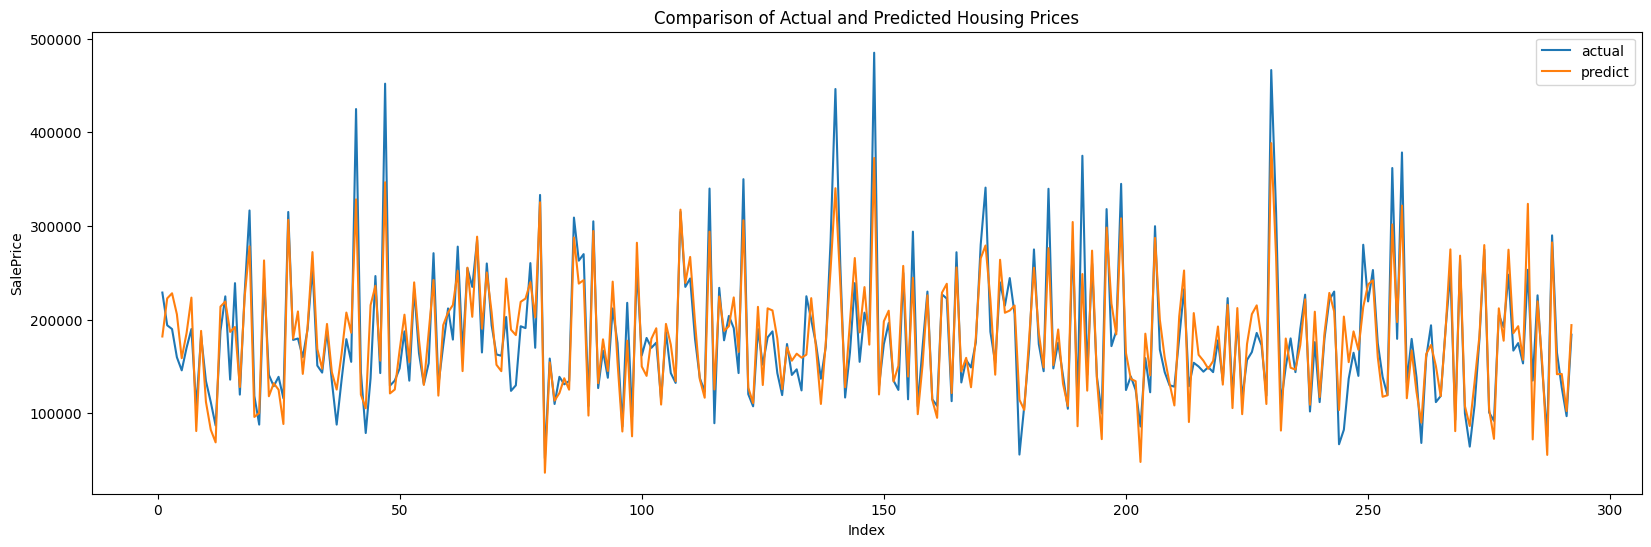

In [ ]:
# ids แทนตัวแปร x ก็คือ มีข้อมูลทั้งหมด 293 record ที่นำมา predict
ids = np.arange(1, 293)

# ปรับขนาดกราฟ
plt.figure(figsize=(20, 6))

# Plot SalePrice ของ y_test และ y_pred
plt.plot(ids, y_test, label='actual')
plt.plot(ids, y_pred, label='predict')

# รายละเอียด
plt.title('Comparison of Actual and Predicted Housing Prices')
plt.xlabel('Index')
plt.ylabel('SalePrice')
plt.legend()

# แสดงกราฟ
plt.show()

## Polynomial Regression

### Degree 2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# สร้าง Object PolynomialFeatures
poly = PolynomialFeatures(degree=2)

## 1. Split data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

## 2. Train model
# ใช้ Model Regression
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

## 3. Predict
y_pred_poly = model_poly.predict(X_test_poly)

## 4. Evaluate
mae = mean_absolute_error(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_poly)

print("Mean Absolute Error: {:.4f}".format(mae))
print("Mean Squared Error: {:.4f}".format(mse))
print("Root Mean Squared Error: {:.4f}".format(rmse))
print("R-squared: {:.4f}".format(r2))

Mean Absolute Error: 20078.3138
Mean Squared Error: 766663544.6016
Root Mean Squared Error: 27688.6898
R-squared: 0.8563


### Degree 3

In [ ]:
# สร้าง Object PolynomialFeatures
poly = PolynomialFeatures(degree=3)

## 1. Split data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

## 2. Train model
# ใช้ Model Regression
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

## 3. Predict
y_pred_poly = model_poly.predict(X_test_poly)

## 4. Evaluate
mae = mean_absolute_error(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_poly)

print("Mean Absolute Error: {:.4f}".format(mae))
print("Mean Squared Error: {:.4f}".format(mse))
print("Root Mean Squared Error: {:.4f}".format(rmse))
print("R-squared: {:.4f}".format(r2))

Mean Absolute Error: 25137.4057
Mean Squared Error: 3817446125.7891
Root Mean Squared Error: 61785.4847
R-squared: 0.2842
